Data loaded:  (117, 9)
Train size:  (93, 4) Test size:  (24, 4)

Model Performance:
MAE: 12.33
RMSE: 13.49
R²: -1.231


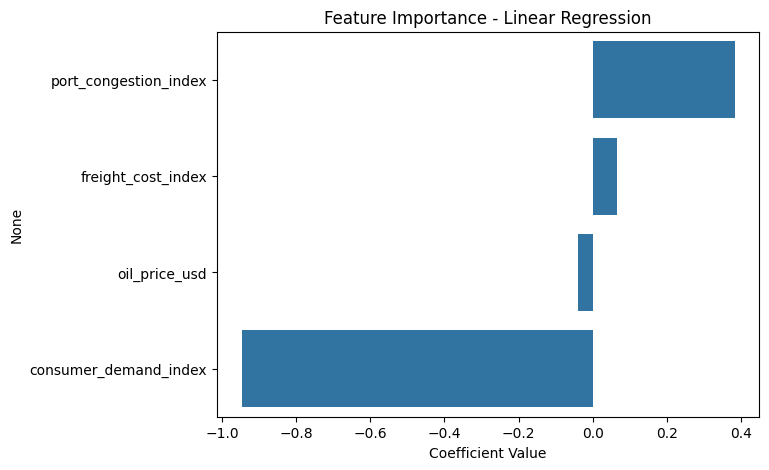

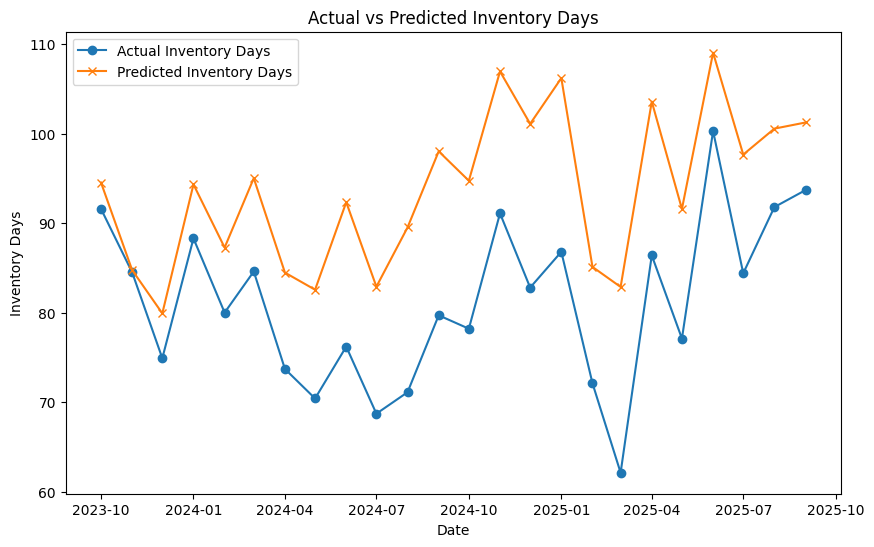

Ridge Regression R²: -1.230
Model Predictions saved


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data_path = "../data/processed/eda_shipping_features_with_nike.csv"
df = pd.read_csv(data_path)
df["date"] = pd.to_datetime(df["date"])
print("Data loaded: ", df.shape)

# Defining features and target
features = ["freight_cost_index", "oil_price_usd", "port_congestion_index", "consumer_demand_index"]
target = "inventory_days"

X = df[features]
y = df[target]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle=False)
print("Train size: ", X_train.shape, "Test size: ", X_test.shape)

# Baseline linear regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"MAE: {mae:0.2f}")
print(f"RMSE: {rmse:0.2f}")
print(f"R²: {r2:.3f}")

# Feature Importance
importance = pd.Series(model.coef_, index=features).sort_values(ascending=False)
plt.figure(figsize=(7,5))
sns.barplot(x=importance.values, y=importance.index)
plt.title("Feature Importance - Linear Regression")
plt.xlabel("Coefficient Value")
plt.show()

# Actual vs Predicted
plt.figure(figsize=(10,6))
plt.plot(df["date"].iloc[-len(y_test):], y_test, label="Actual Inventory Days", marker="o")
plt.plot(df["date"].iloc[-len(y_test):], y_pred, label="Predicted Inventory Days", marker="x")
plt.title("Actual vs Predicted Inventory Days")
plt.xlabel("Date")
plt.ylabel("Inventory Days")
plt.legend()
plt.show()

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

ridge_r2 = r2_score(y_test, ridge_pred)
print(f"Ridge Regression R²: {ridge_r2:.3f}")

# Saving model outputs
output_df = pd.DataFrame({
    "date": df["date"].iloc[-len(y_test)],
    "actual_inventory": y_test.values,
    "predicted_inventory": y_pred,
    "ridge_predicted_inventory": ridge_pred
})
output_df.to_csv("../data/processed/model_predictions_inventory.csv", index=False)
print("Model Predictions saved")